In [1]:
import pandas as pd

In [8]:
titanic = pd.read_csv('C:/Users/omkar/OneDrive/Desktop/Self/Python/PyTorch/pytorch-building-deep-learning-models/datasets/titanic_data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
column = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
titanic_data = titanic[column]

In [11]:
titanic_data = titanic_data.dropna()
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [12]:
from sklearn import preprocessing

In [13]:
le = preprocessing.LabelEncoder()

In [14]:
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [17]:
features = ['Pclass', 'Sex', 'Age', 'Fare']
titanic_features = titanic_data[features]
titanic_features.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [20]:
titanic_features = pd.get_dummies(titanic_features, columns=['Pclass'])
titanic_features.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,7.2500,0,0,1
1,0,38.0,71.2833,1,0,0
2,0,26.0,7.9250,0,0,1
3,0,35.0,53.1000,1,0,0
4,1,35.0,8.0500,0,0,1


In [21]:
titanic_target = titanic_data[['Survived']]

In [23]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, x_test, Y_train, y_test = train_test_split(titanic_features, titanic_target, test_size=0.2, random_state=0)

In [40]:
X_train.shape, Y_train.shape

((571, 6), (571, 1))

In [27]:
import torch
import numpy as np

In [41]:
X_train_ = torch.from_numpy(X_train.values).float()
X_test_ = torch.from_numpy(x_test.values).float()

In [43]:
Y_train_ = torch.from_numpy(Y_train.values).view(1,-1)[0]
Y_test_ = torch.from_numpy(y_test.values).view(1,-1)[0]

In [44]:
Y_train_.shape

torch.Size([571])

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [47]:
input_size = 6
output_size = 2
hidden_size = 10

In [48]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim = -1)

In [49]:
model = Net()

In [50]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

loss_fn = nn.NLLLoss()

In [51]:
epoch_data = []
epochs = 1001

In [52]:
for epoch in range (1, epochs):
    
    optimizer.zero_grad()
    y_pred = model(X_train_)
    
    loss = loss_fn(y_pred, Y_train_)
    loss.backward()
    
    optimizer.step()
    
    Y_pred_test = model(X_test_)
    loss_test = loss_fn(Y_pred_test, Y_test_)
    
    _,pred = Y_pred_test.data.max(1)
    
    accuracy = pred.eq(Y_test_.data).sum().item() / y_test.values.size
    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])
    
    if epoch % 100 == 0:
        print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f' \
             % (epoch, epoch/150 * 10, loss.data.item(), loss_test.data.item(), accuracy))

C:\Users\omkar\Anaconda3\AnacondaNew\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch - 100 (6%) train loss - 0.64 test loss - 0.65 accuracy - 0.5524
epoch - 200 (13%) train loss - 0.60 test loss - 0.61 accuracy - 0.6783
epoch - 300 (20%) train loss - 0.57 test loss - 0.57 accuracy - 0.6853
epoch - 400 (26%) train loss - 0.53 test loss - 0.52 accuracy - 0.7343
epoch - 500 (33%) train loss - 0.49 test loss - 0.47 accuracy - 0.8042
epoch - 600 (40%) train loss - 0.46 test loss - 0.43 accuracy - 0.8462
epoch - 700 (46%) train loss - 0.44 test loss - 0.42 accuracy - 0.8042
epoch - 800 (53%) train loss - 0.42 test loss - 0.41 accuracy - 0.8322
epoch - 900 (60%) train loss - 0.41 test loss - 0.41 accuracy - 0.8462
epoch - 1000 (66%) train loss - 0.40 test loss - 0.41 accuracy - 0.8462


In [55]:
df_epoch_data = pd.DataFrame(epoch_data, columns = ["epoch", "train_loss", "test_loss", "accuracy"])

df_epoch_data.head()

,epoch,train_loss,test_loss,accuracy
0,1,0.692063,0.687717,0.552448
1,2,0.690255,0.686674,0.629371
2,3,0.688502,0.685670,0.713287
3,4,0.686803,0.684710,0.678322
4,5,0.685158,0.683798,0.685315


In [56]:
import matplotlib.pyplot as plt

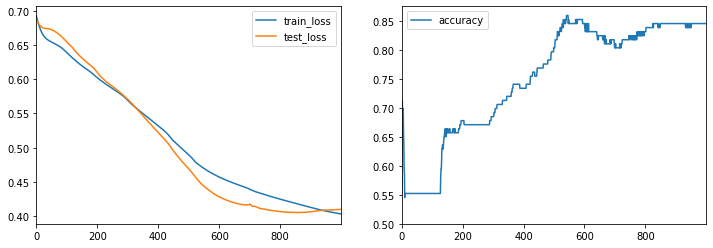

In [57]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

df_epoch_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epoch_data[["accuracy"]].plot(ax=ax2)
plt.ylim(ymin=0.5)

plt.show()